In [168]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [169]:
##### OPEN CSV FUNCTION #####
def openCsv(num_episodes_path):
    train_path = 'data/train/train_steps_'
    df = pd.read_csv(train_path+num_episodes_path+'.csv')
    return df

##### TOTAL EPISODES FUNCTION #####
def totEpisodes(df):
    tot_episodes = df['episode'].max()
    return tot_episodes

##### HIGHEST SCORE FUNCTION #####
def highestScore(df):
    highest_score = df[df['highest_score']==df['highest_score'].max()]
    return highest_score

##### MAX TILE FUNCTION #####
def maxTile(df):
    max_tile = df[df['max_tile']==df['max_tile'].max()]
    return max_tile

##### PLOT SCORES FUNCTION #####
def plotScores(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)
    x1,x2,x3,x4,y1,y2,y3,y4 = [],[],[],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] <= 256:
            x1.append(row['episode'])
            y1.append(row['highest_score'])
        elif row['max_tile'] == 512:
            x2.append(row['episode'])
            y2.append(row['highest_score'])
        elif row['max_tile'] == 1024:
            x3.append(row['episode'])
            y3.append(row['highest_score'])
        else:
            x4.append(row['episode'])
            y4.append(row['highest_score'])
    plt.figure(figsize=(20,16))
    plt.title('Plot scores for '+str(num_episodes)+' number of episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Highest score')
    plt.scatter(x=x1, y=y1, s=1, c='red')
    plt.scatter(x=x2, y=y2, s=50, c='#fde910')
    plt.scatter(x=x3, y=y3, s=200, c='green')
    plt.scatter(x=x4, y=y4, s=1000, c='#1E90FF')
    
    red_patch = mpatches.Patch(color='red', label='episodes with max_tile <= 256')
    yellow_patch = mpatches.Patch(color='#fde910', label='episodes with max_tile == 512')
    green_patch = mpatches.Patch(color='green', label='episodes with max_tile == 1024')
    blue_patch = mpatches.Patch(color='#1E90FF', label='episodes with max_tile >= 2048')
    plt.legend(handles=[red_patch, yellow_patch,green_patch,blue_patch])
    
    plt.show()

##### PLOT TILES FUNCTION #####
def plotMaxTiles(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 22}
    
    plt.rc('font', **font)
    x_lowest,y_lowest,x_512,y_512,x_1024,y_1024,x_2048,y_2048 = [],[],[],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] < 512:
            x_lowest.append(row['episode'])
            y_lowest.append(row['max_tile'])
        elif row['max_tile'] == 512:
            x_512.append(row['episode'])
            y_512.append(row['max_tile'])
        elif row['max_tile'] == 1024:
            x_1024.append(row['episode'])
            y_1024.append(row['max_tile'])
        elif row['max_tile'] == 2048:
            x_2048.append(row['episode'])
            y_2048.append(row['max_tile'])
    
    plt.figure(figsize=(20,16))
    plt.title('Plot max tiles for '+str(num_episodes)+' number of episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Max Tile')
    x = df['episode']
    y = df['max_tile']
    plt.scatter(x=x_lowest, y=y_lowest, s=1, c='red')
    plt.scatter(x=x_512, y=y_512, s=25, c='#fde910')
    plt.scatter(x=x_1024, y=y_1024, s=50, c='green')
    plt.scatter(x=x_2048, y=y_2048, s=1000, c='#1E90FF')
    
    red_patch = mpatches.Patch(color='red', label='max_tile <= 256')
    yellow_patch = mpatches.Patch(color='#fde910', label='max_tile == 512')
    green_patch = mpatches.Patch(color='green', label='max_tile == 1024')
    blue_patch = mpatches.Patch(color='#1E90FF', label='max_tile == 2048')
    plt.legend(handles=[red_patch, yellow_patch,green_patch,blue_patch])
    
    
    plt.show()

# Evaluation Scheme:

For each execution (in which we set a number of different training steps) we report:
1. An extract of the csv saved in the train (Pandas dataframe)
2. Number of games he trained on (episodes)
3. Highest score achieved in training
4. Max tile achieved in training
5. Scatter plot of scores achieved in training & test (only for the last three execution)
6. Scatter plot of max tile achieved in training & test (only for the last three execution)

## First case: 5000 steps

In [170]:
##### NB_STEPS_TRAINING = int(5e3) #####

num_steps_5e3 = int(5e3)
df_5e3 = openCsv(str(num_steps_5e3))
df_5e3.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,128,348.0,32.0
1,2,719,1156.0,128.0
2,3,386,512.0,64.0
3,4,1054,1432.0,128.0
4,5,571,760.0,64.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0
7,8,607,880.0,64.0


In [171]:
totEpisodes(df_5e3)

8

In [172]:
highestScore(df_5e3)

,episode,episode_steps,highest_score,max_tile
5,6,807,1656.0,128.0


In [173]:
maxTile(df_5e3)

,episode,episode_steps,highest_score,max_tile
1,2,719,1156.0,128.0
3,4,1054,1432.0,128.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0


## Second case: 50.000 steps

In [174]:
##### NB_STEPS_TRAINING = int(5e4) #####

num_steps_5e4 = int(5e4)
df_5e4 = openCsv(str(num_steps_5e4))
df_5e4.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,128,348.0,32.0
1,2,719,1156.0,128.0
2,3,386,512.0,64.0
3,4,1054,1432.0,128.0
4,5,571,760.0,64.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0
7,8,607,880.0,64.0
8,9,522,1964.0,128.0
9,10,402,1388.0,128.0


In [175]:
totEpisodes(df_5e4)

155

In [176]:
highestScore(df_5e4)

,episode,episode_steps,highest_score,max_tile
139,140,599,6916.0,512.0


In [177]:
maxTile(df_5e4)

,episode,episode_steps,highest_score,max_tile
54,55,426,5196.0,512.0
77,78,408,5252.0,512.0
79,80,551,6196.0,512.0
81,82,501,5312.0,512.0
85,86,522,5516.0,512.0
94,95,416,5528.0,512.0
108,109,388,4600.0,512.0
112,113,416,4676.0,512.0
115,116,513,5268.0,512.0
123,124,300,4564.0,512.0


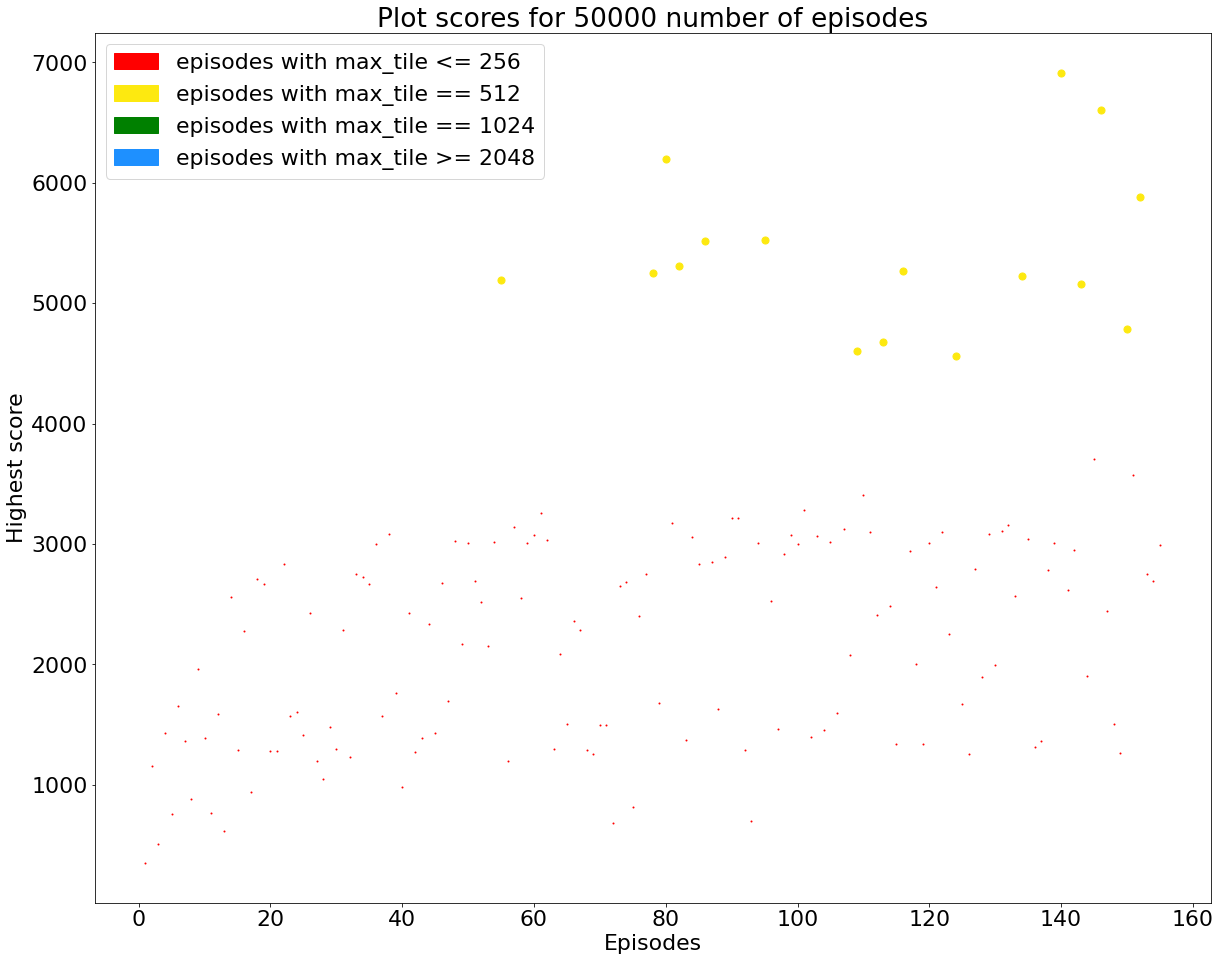

In [178]:
plotScores(df_5e4, num_steps_5e4)

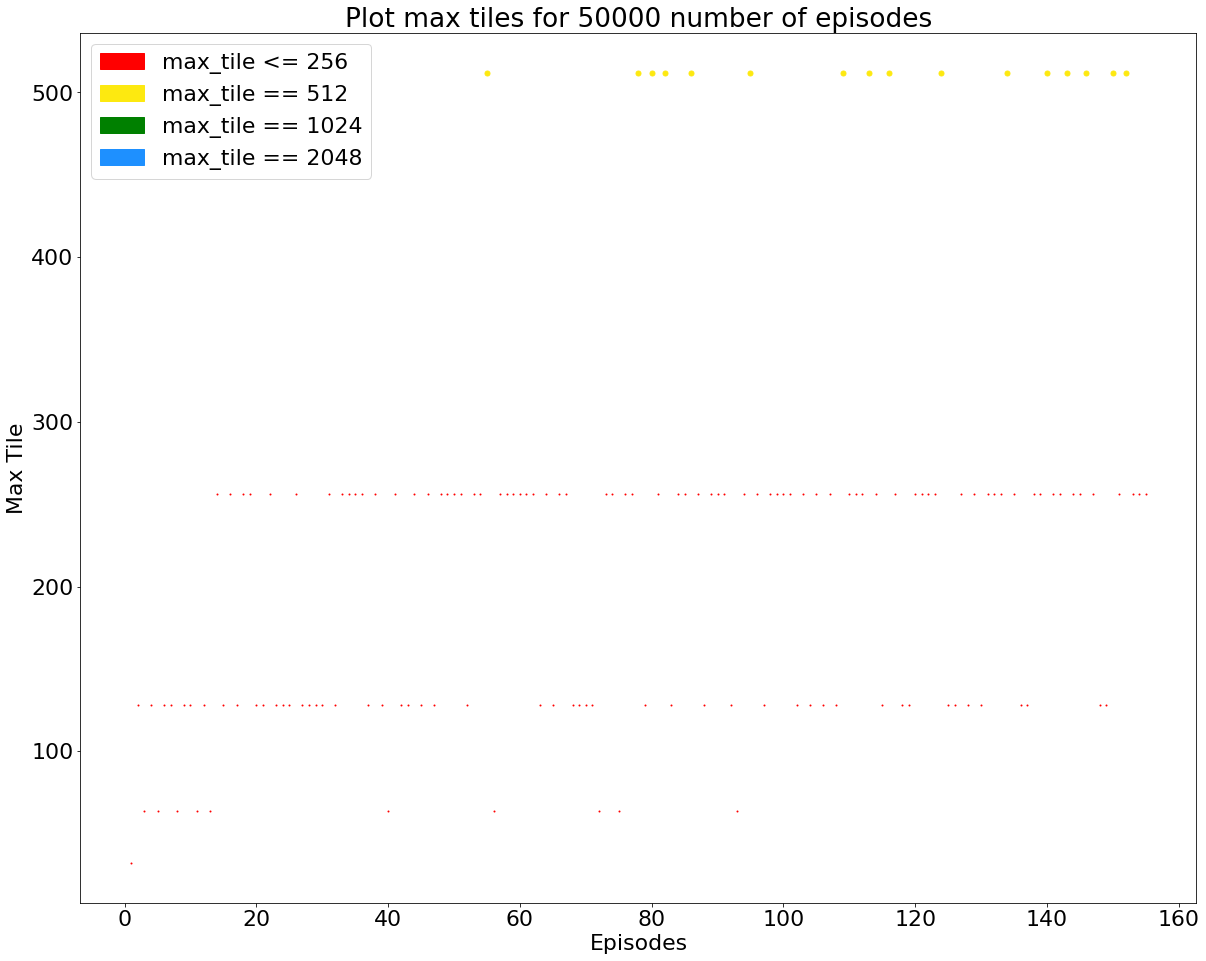

In [179]:
plotMaxTiles(df_5e4, num_steps_5e4)

## Third case: 500.000 steps

In [180]:
##### NB_STEPS_TRAINING = int(5e5) #####

num_steps_5e5 = int(5e5)
df_5e5 = openCsv(str(num_steps_5e5))
df_5e5.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,570,432.0,32.0
1,2,686,656.0,64.0
2,3,1085,1260.0,128.0
3,4,776,860.0,128.0
4,5,682,1096.0,64.0
5,6,955,1480.0,128.0
6,7,320,544.0,64.0
7,8,609,1272.0,64.0
8,9,431,1348.0,128.0
9,10,436,672.0,64.0


In [181]:
totEpisodes(df_5e5)

1118

In [182]:
highestScore(df_5e5)

,episode,episode_steps,highest_score,max_tile
1073,1074,852,13784.0,1024.0


In [183]:
maxTile(df_5e5)

,episode,episode_steps,highest_score,max_tile
699,700,682,10336.0,1024.0
859,860,703,10860.0,1024.0
878,879,784,11288.0,1024.0
1003,1004,697,11268.0,1024.0
1019,1020,800,11960.0,1024.0
1073,1074,852,13784.0,1024.0


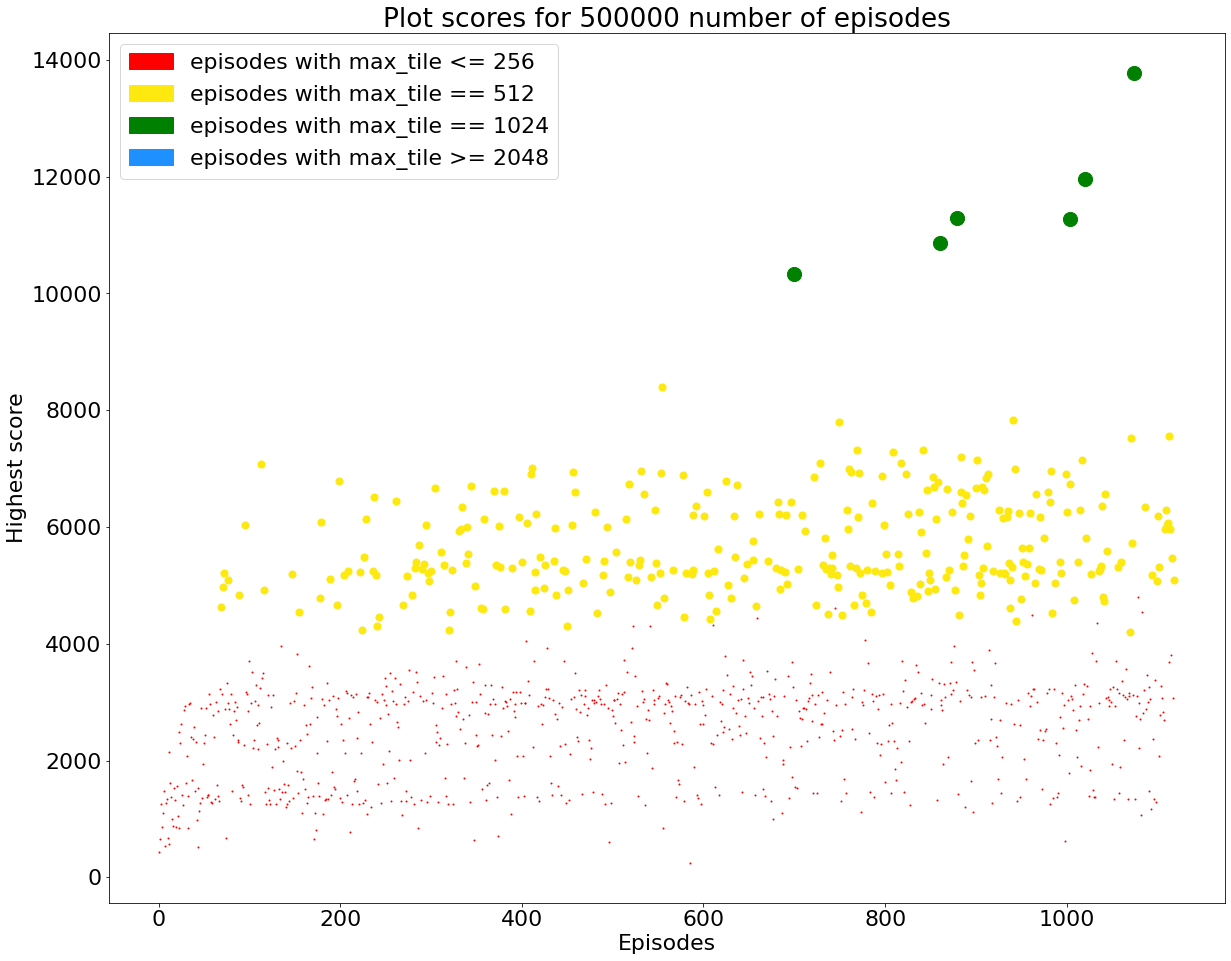

In [184]:
plotScores(df_5e5, num_steps_5e5)

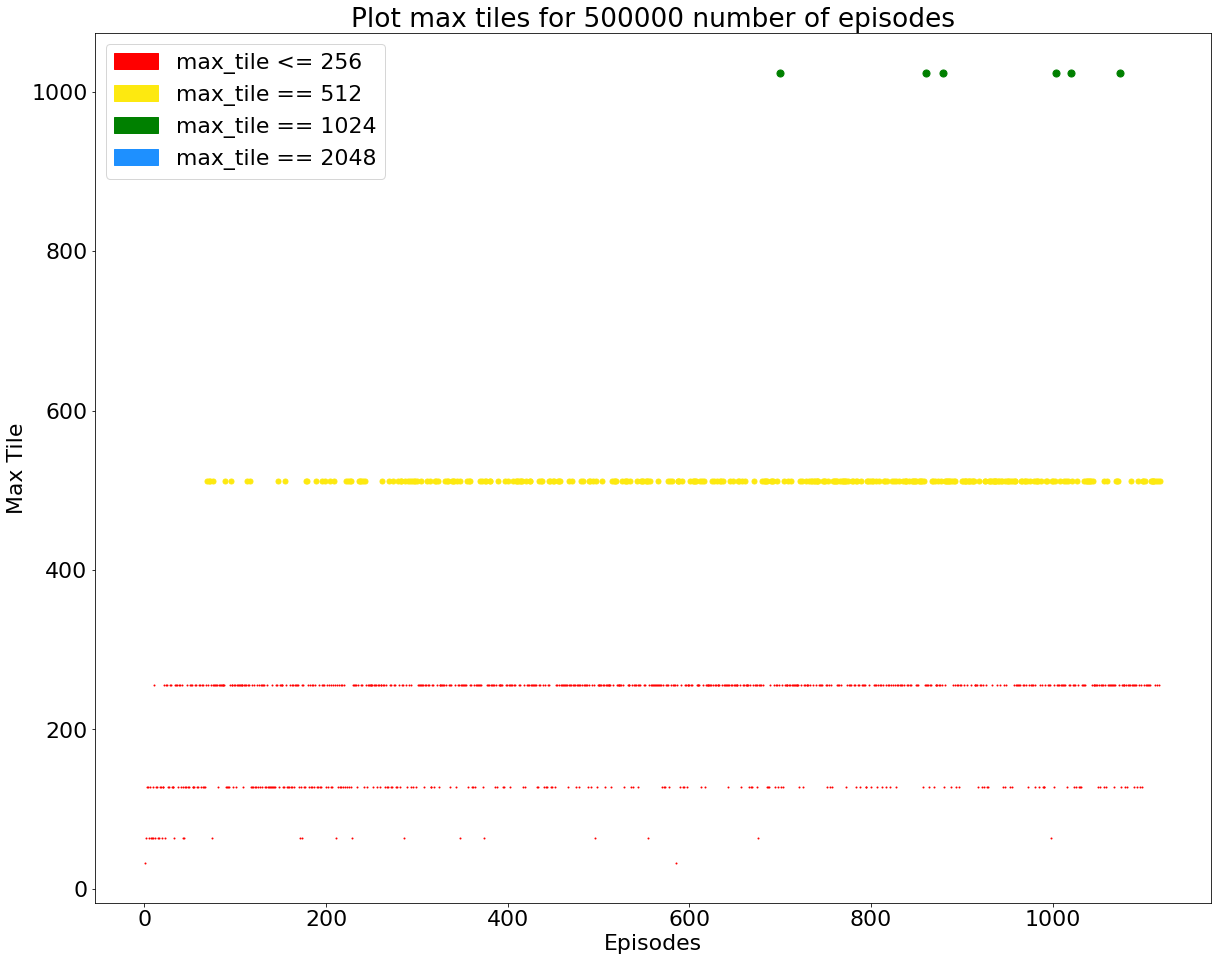

In [185]:
plotMaxTiles(df_5e5, num_steps_5e5)

## Fourth case: 5.000.000 steps

In [186]:
##### NB_STEPS_TRAINING = int(5e6) #####

num_steps_5e6 = int(5e6)
df_5e6 = openCsv(str(num_steps_5e6))
df_5e6.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,570,432.0,32.0
1,2,686,656.0,64.0
2,3,1085,1260.0,128.0
3,4,776,860.0,128.0
4,5,682,1096.0,64.0
5,6,955,1480.0,128.0
6,7,320,544.0,64.0
7,8,286,588.0,64.0
8,9,285,792.0,64.0
9,10,405,1716.0,128.0


In [187]:
totEpisodes(df_5e6)

11168

In [188]:
highestScore(df_5e6)

,episode,episode_steps,highest_score,max_tile
7561,7562,1162,20640.0,2048.0


In [189]:
maxTile(df_5e6)

,episode,episode_steps,highest_score,max_tile
3847,3848,915,19956.0,2048.0
7561,7562,1162,20640.0,2048.0
8710,8711,1028,20212.0,2048.0
9748,9749,1095,20272.0,2048.0
9960,9961,1081,20104.0,2048.0
10036,10037,1179,20288.0,2048.0
10516,10517,1000,19940.0,2048.0


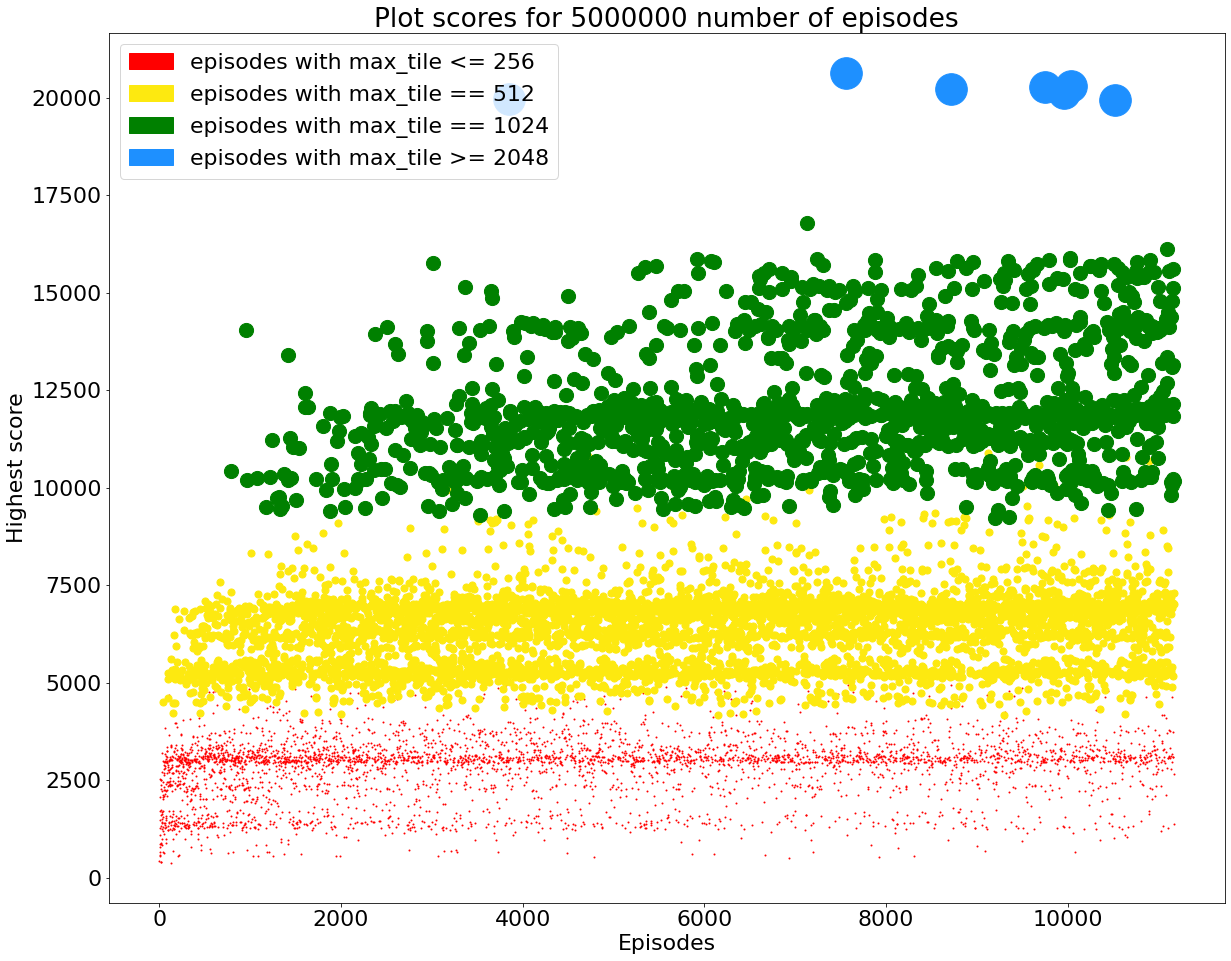

In [190]:
plotScores(df_5e6, num_steps_5e6)

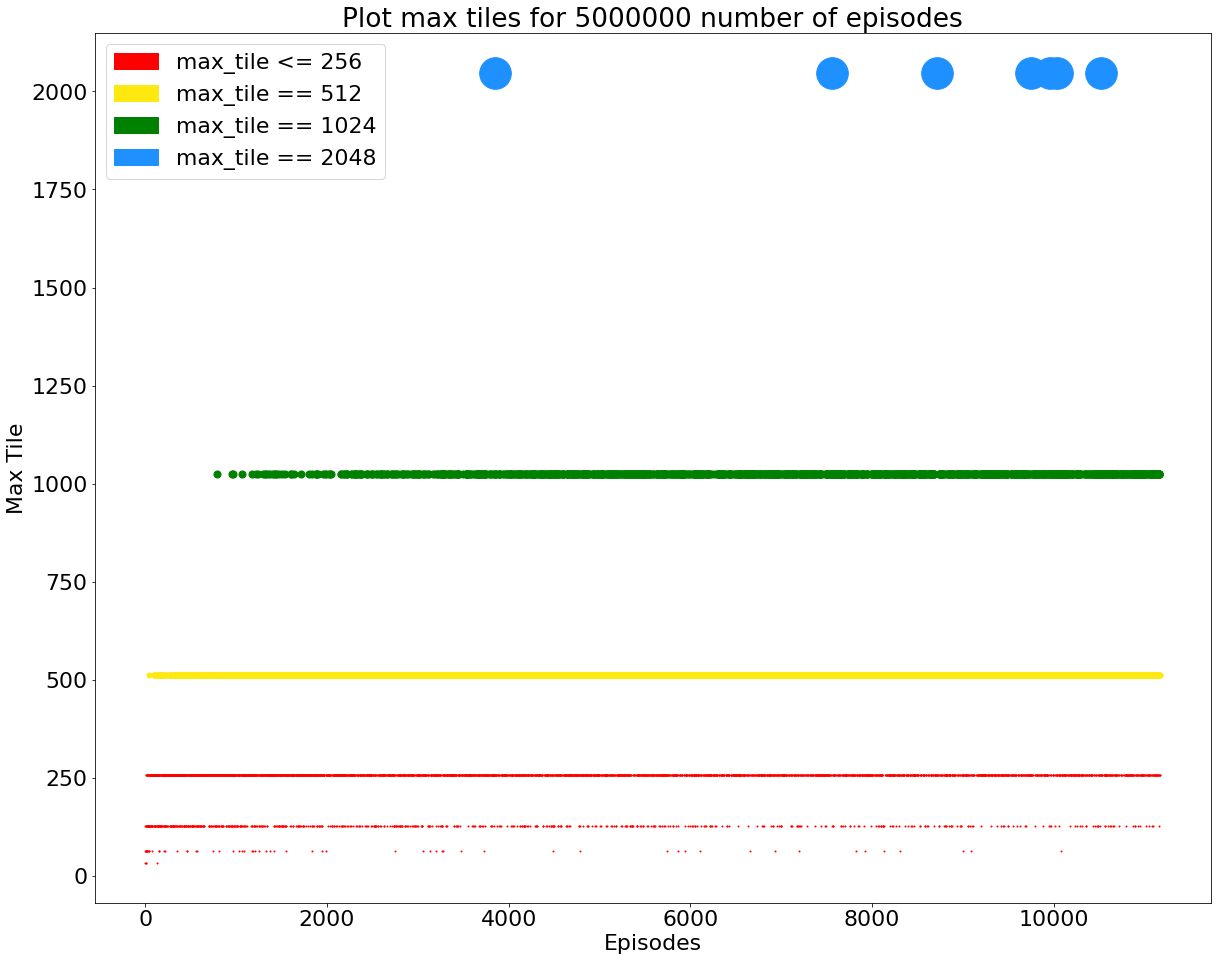

In [191]:
plotMaxTiles(df_5e6, num_steps_5e6)

## Fifth case: 10.000.000 steps

# Highest score evolution during executions

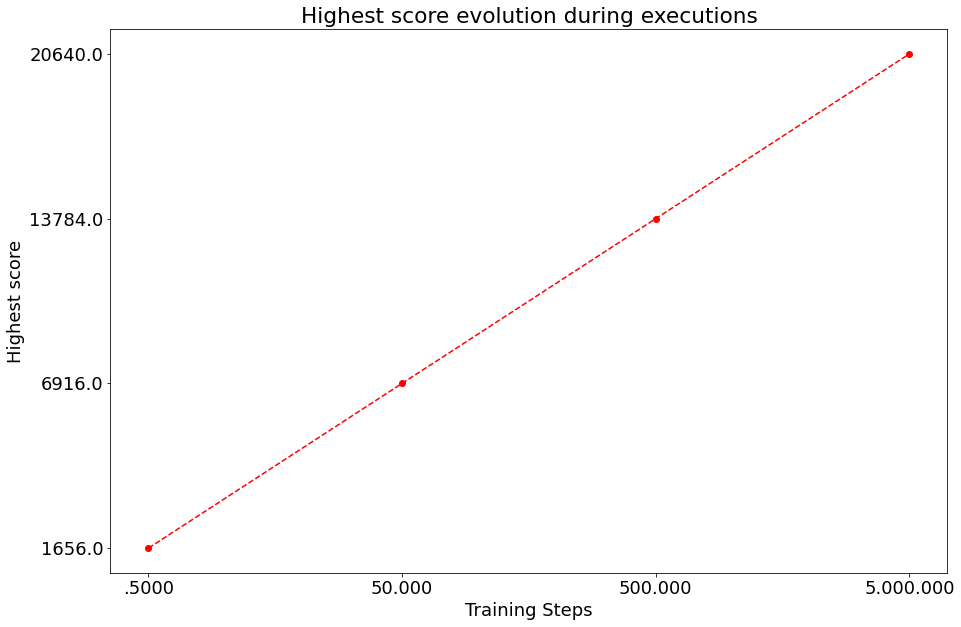

In [197]:
highest_score_df3 = df_5e3['highest_score'].max()
highest_score_df4 = df_5e4['highest_score'].max()
highest_score_df5 = df_5e5['highest_score'].max()
highest_score_df6 = df_5e6['highest_score'].max()

data = np.array([
    [".5000", highest_score_df3],
    ["50.000", highest_score_df4],
    ["500.000", highest_score_df5],
    ["5.000.000", highest_score_df6],
])

font = {'family' : 'normal',
        'size'   : 18}
    
plt.rc('font', **font)
x, y = data.T
plt.figure(figsize=(15,10))
plt.title('Highest score evolution during executions')
plt.xlabel('Training Steps')
plt.ylabel('Highest score')
plt.plot(x,y,'r--')
plt.scatter(x,y,c='red')
plt.show()

# Scores evolution comparisons between different training steps

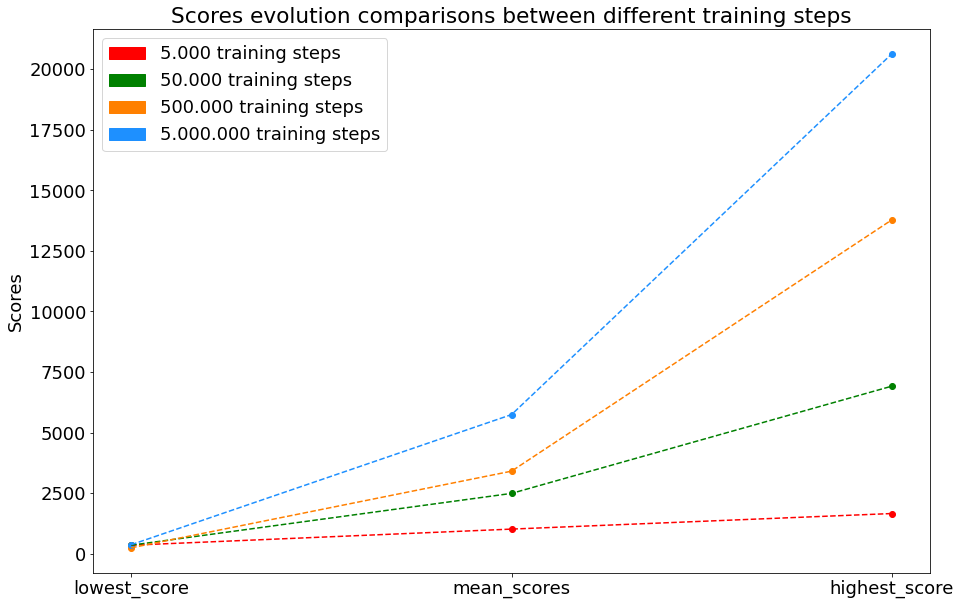

In [196]:
def get_scores_evolution(df): 
    evolution = []
    evolution.append(int(df['highest_score'].min())) # lowest score
    evolution.append(int(df['highest_score'].mean())) # mean of the scores
    evolution.append(int(df['highest_score'].max())) # Highest score
    return evolution

scores_evolution_df_5e3 = get_scores_evolution(df_5e3)
scores_evolution_df_5e4 = get_scores_evolution(df_5e4)
scores_evolution_df_5e5 = get_scores_evolution(df_5e5)
scores_evolution_df_5e6 = get_scores_evolution(df_5e6)

font = {'family' : 'normal',
        'size'   : 18}
    
plt.rc('font', **font)
plt.figure(figsize=(15,10))
plt.title('Scores evolution comparisons between different training steps')
plt.ylabel('Scores')
x = ["lowest_score","mean_scores","highest_score"]

plt.plot(x,scores_evolution_df_5e3, 'r--', color="red")
plt.scatter(x,scores_evolution_df_5e3, color="red")

plt.plot(x,scores_evolution_df_5e4,'r--', color="green")
plt.scatter(x,scores_evolution_df_5e4, color="green")

plt.plot(x,scores_evolution_df_5e5,'r--', color="#ff8000")
plt.scatter(x,scores_evolution_df_5e5, color="#ff8000")

plt.plot(x,scores_evolution_df_5e6,'r--', color="#1E90FF")
plt.scatter(x,scores_evolution_df_5e6, color="#1E90FF")

red_patch = mpatches.Patch(color='red', label='5.000 training steps')
green_patch = mpatches.Patch(color='green', label='50.000 training steps')
orange_patch = mpatches.Patch(color='#ff8000', label='500.000 training steps')
blue_patch = mpatches.Patch(color='#1E90FF', label='5.000.000 training steps')
plt.legend(handles=[red_patch, green_patch,orange_patch,blue_patch])

plt.show()